In [3]:
import pandas as pd
import numpy as np
import os
import json

import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [24]:
def errors(x):
    return np.sqrt(x)

#changing function to true-false boolean on errors:

def line(a, x, b=0, errors=False):
    np.random.randn(123)
    if errors is False:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * np.sqrt(x)

### 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

In [83]:
x = [10,20,30,40,50,60,70,80,90,100]
y = [15,35,65,80,110,105,130,150,160,190]
x = np.array(x)
y = np.array(y)
y_error = errors(x)
line_est = line(2,x,0,errors=True)

In [84]:
line_est

array([  16.3136568 ,   45.10479497,   52.3657893 ,   81.64597013,
        100.79202033,  110.90935605,  134.42325059,  178.01712563,
        181.24540128,  194.44864343])

Text(0.5,1,'Fig 1: Illustration of Graph with Errror Bars and a Line of Best Fit')

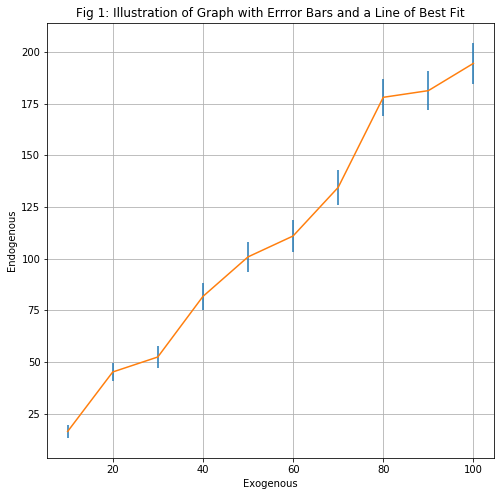

In [85]:
fig = plt.figure(figsize=(8,8)) #initialize figure
ax1 = fig.add_subplot(111) #initialize first axis

ax1.errorbar(x,line_est,yerr=y_error,fmt='none',marker='o')
ax1.plot(x,line_est)

#add stylistic elements:

ax1.set_xlabel("Exogenous") #x label added
ax1.set_ylabel("Endogenous") #add Y label
ax1.grid()

plt.title("Fig 1: Illustration of Graph with Errror Bars and a Line of Best Fit")


### 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [48]:
print("this is the x array:",x)
print("this is the y array:",y)

this is the x array: [ 10  20  30  40  50  60  70  80  90 100]
this is the y array: [ 15  35  65  80 110 105 130 150 160 190]


In [49]:
X = sm.add_constant(x)
print("This is x with the add_constant function applied to it",X)

This is x with the add_constant function applied to it [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


### 3. use statsmodels.api.OLS to fit x and y

In [86]:
#The Wrong Way:
wrong_model = sm.OLS(line_est,x).fit()
wrong_model.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2423.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.95e-12
Time:                        12:53:04   Log-Likelihood:                -34.422
No. Observations:                  10   AIC:                             70.84
Df Residuals:                       9   BIC:                             71.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.0001      0.041     49.228      0.000         1.908     2.092
==============================================================================
Omnibus:                        7.118   Durbin-Watson:                   2.309
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                2.800
Skew:                           1.211   Prob(JB):                        0.247
Kurtosis:                       3.926   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
#The Right Way!
X = sm.add_constant(x)
right_model = sm.OLS(line_est,X).fit()
right_model.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     485.6
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.90e-08
Time:                        12:53:12   Log-Likelihood:                -34.327
No. Observations:                  10   AIC:                             72.65
Df Residuals:                       8   BIC:                             73.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.2369      5.722     -0.391      0.706       -15.432    10.958
x1             2.0321      0.092     22.036      0.000         1.819     2.245
==============================================================================
Omnibus:                        5.171   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                1.985
Skew:                           1.062   Prob(JB):                        0.371
Kurtosis:                       3.502   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Discussion:

#### The first model, the wrong model,  does not add an y-intercept to the OLS estimate. As a result, it estimates a lower coefficient for x than does the second model (because the intercept is the second model is estimated to be negative), at a statistically significance level of 95%. Though both models have very high r-squared values, it is slightly lower for the second model. The second model also has a wider confidence interval for x than does the first model and of course reports an intercept value.

#### It is important to fit an intercept for an OLS model because otherwise the model is likely to incorrectly estimate the impact of x on y, whereas an intercept allows the OLS model to account for baseline behavior in y. This is perhaps best exhibited by a variable y that has a clear minimum, for example, if we were measuring the speed that a car was traveling (not the acceleration!) it could not go below 0. At 0 km/h the car is just not moving and cannot go slower than this.

### 4. plot the data (as points) and both statsmodels fits

Text(0.5,1,'Fig 2: Predicted vs. Actual Values for OLS without Intercept (Wrong Model)')

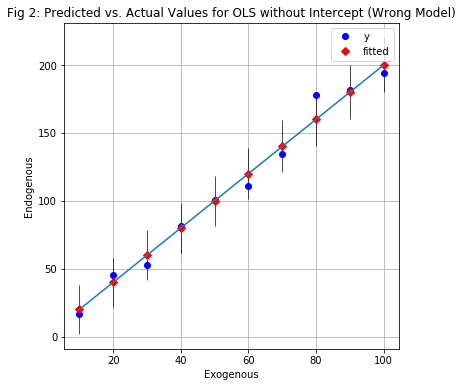

In [101]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)

sm.graphics.plot_fit(wrong_model,0,ax=ax1)
ax1.plot(x, wrong_model.fittedvalues, '-', label="OLS Line of Best Fit")

ax1.set_xlabel("Exogenous") 
ax1.set_ylabel("Endogenous") 
ax1.grid() #add grid lines)
ax1.set_title("Fig 2: Predicted vs. Actual Values for OLS without Intercept (Wrong Model)")


Text(0.5,1,'Fig 3: Predicted vs. Actual Values for OLS with Intercept (Right Model)')

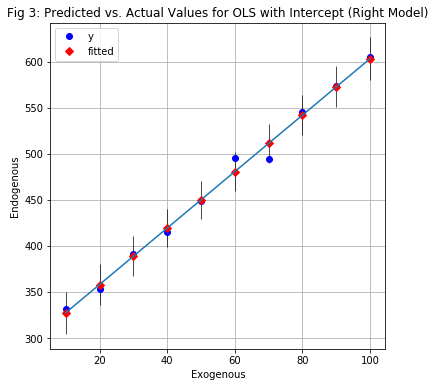

In [102]:
fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(111)

sm.graphics.plot_fit(right_model,1,ax=ax2)
ax2.plot(x, right_model.fittedvalues, '-', label="OLS Line of Best Fit")

ax2.set_xlabel("Exogenous") #x label added
ax2.set_ylabel("Endogenous") #add Y label
ax2.grid() #add grid
ax2.set_title("Fig 3: Predicted vs. Actual Values for OLS with Intercept (Right Model)")


###  5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [90]:
x2 = [10,20,30,40,50,60,70,80,90,100]
x2 = np.array(x2)

y2_error = errors(x2)
line2_est = line(3,x2,300,errors=True)

Text(0.5,1,'Fig 1: Illustration of Graph with Error Bars and a Line of Best Fit')

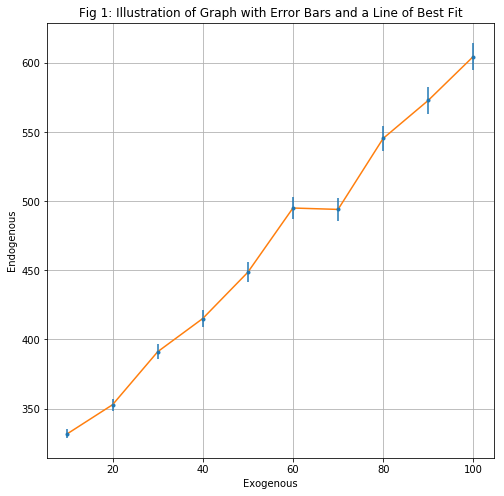

In [103]:
fig = plt.figure(figsize=(8,8)) #initialize figure
ax1 = fig.add_subplot(111) #initialize first axis

ax1.errorbar(x2,line2_est,yerr=y2_error,fmt='.')
ax1.plot(x,line2_est)

#add stylistic elements:

ax1.set_xlabel("Exogenous") #x label added
ax1.set_ylabel("Endogenous") #add Y label
ax1.grid()

plt.title("Fig 1: Illustration of Graph with Error Bars and a Line of Best Fit")


### 6. repeat step 3

In [92]:
#The Wrong Way:
wrong_model2 = sm.OLS(line2_est,x2).fit()
wrong_model2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     97.63
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           3.95e-06
Time:                        13:00:16   Log-Likelihood:                -63.431
No. Observations:                  10   AIC:                             128.9
Df Residuals:                       9   BIC:                             129.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             7.3026      0.739      9.881      0.000         5.631     8.974
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.628
Skew:                           0.016   Prob(JB):                        0.730
Kurtosis:                       1.772   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#The Right Way!
X2 = sm.add_constant(x2)
right_model = sm.OLS(line2_est,X2).fit()
right_model.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1046.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           9.11e-10
Time:                        13:00:40   Log-Likelihood:                -34.597
No. Observations:                  10   AIC:                             73.19
Df Residuals:                       8   BIC:                             73.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        296.7306      5.878     50.481      0.000       283.176   310.285
x1             3.0635      0.095     32.339      0.000         2.845     3.282
==============================================================================
Omnibus:                        2.950   Durbin-Watson:                   3.204
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                0.512
Skew:                          -0.411   Prob(JB):                        0.774
Kurtosis:                       3.743   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discussion:

#### The comparison of these two models, given the larger intercept built into the underlying data, shows even more starkly the importance of including an intercept term in your OLS estimates. The coefficient on X in the model without an intercept is approx. 7, while only 3 in the model where an intercept term is included. This is for the same reasons discussed above, when an intercept term is included it captures a lot of the baseline behavior of y and so the model does not overestimate the impact of x on y (thus a smaller coefficient). 

#### Now we can also see, with a larger intercept, that the second model better fits the data - The r-square is improved over the first model (which is trying to capture all of y in x).

###  7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [97]:
#use X2 and line2_est from above which already has a constant built into it

weights = 1 / y2_error #using the variance/error at each observation to reduce the impact of outlier/high error observations
WLS_model = sm.WLS(line2_est,X2,weights=weights).fit()
WLS_model.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1237.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.67e-10
Time:                        13:13:02   Log-Likelihood:                -34.125
No. Observations:                  10   AIC:                             72.25
Df Residuals:                       8   BIC:                             72.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        297.6238      4.621     64.409      0.000       286.968   308.280
x1             3.0488      0.087     35.170      0.000         2.849     3.249
==============================================================================
Omnibus:                        1.237   Durbin-Watson:                   3.168
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.132
Skew:                          -0.275   Prob(JB):                        0.936
Kurtosis:                       3.124   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The WLS model reduced our standard error on x and reduced the range of the confidence interval at the 95% significance level. Since we are weighting observations inversely to their deviation from the mean/expected value these results make sense.